<a href="https://colab.research.google.com/github/alessandronascimento/pyLiBELa/blob/main/Colabs/dockrmsd_sb2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#usando o Dock RMSD encontrado em https://zhanggroup.org/DockRMSD/

!rm -rf Dock* src/*
!rmdir src
!wget https://zhanggroup.org/DockRMSD/DockRMSD.c
!wget https://zhanggroup.org/DockRMSD/DockRMSD.h
!gcc DockRMSD.c -o DockRMSD -lm -O3
!mkdir src
!mv DockRMSD.* src/

#ajeitar

rmdir: failed to remove 'src': No such file or directory
--2023-10-06 14:26:14--  https://zhanggroup.org/DockRMSD/DockRMSD.c
Resolving zhanggroup.org (zhanggroup.org)... 141.213.137.249
Connecting to zhanggroup.org (zhanggroup.org)|141.213.137.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24206 (24K) [text/plain]
Saving to: ‘DockRMSD.c’

DockRMSD.c          100%[===================>]  23.64K  --.-KB/s    in 0.04s   

2023-10-06 14:26:14 (652 KB/s) - ‘DockRMSD.c’ saved [24206/24206]

--2023-10-06 14:26:14--  https://zhanggroup.org/DockRMSD/DockRMSD.h
Resolving zhanggroup.org (zhanggroup.org)... 141.213.137.249
Connecting to zhanggroup.org (zhanggroup.org)|141.213.137.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24072 (24K) [text/plain]
Saving to: ‘DockRMSD.h’

DockRMSD.h          100%[===================>]  23.51K  --.-KB/s    in 0.03s   

2023-10-06 14:26:14 (692 KB/s) - ‘DockRMSD.h’ saved [24072/24072]



In [1]:
#@title Getting SB2021 data {display-mode: "form"}

%%capture
from google.colab import drive
drive.mount('/content/drive/')
sb_folder = '/content/drive/MyDrive/pyLiBELa/SB/' #@param {type:"string"}

%cd $sb_folder
targets=[]
targets_file = open('list', 'r');
for line in targets_file:
  targets.append(line.strip())
targets_file.close()

targets = targets[:-2] #os últimos 2 são list e list.txt, só quero os pdb

In [53]:
import os
import numpy as np

energy_optimizer = 'stogo' #colocar formulário

#index_array = np.array(df.index)
target_cut = targets[:]

rmsd_list = np.zeros(len(target_cut))

k=0

for target in target_cut:
  print(k, target)

  folder = sb_folder+target

  %cd $folder
  subfolder = "self_docking_"+energy_optimizer
  ! mkdir -p data
  %cd $subfolder

  if "McLiBELa_dock.mol2.gz" in os.listdir():

    !rm -rf McLiBELa.mol2 ligref.mol2

    !cp lig.mol2.gz ligref.mol2.gz
    !gunzip -f ligref.mol2.gz


    !cp McLiBELa_dock.mol2.gz McLiBELa.mol2.gz
    !gunzip -f McLiBELa.mol2.gz

    %cd ../data

    ligref = sb_folder+target+'/'+subfolder+'/ligref.mol2'
    ligdock = sb_folder+target+'/'+subfolder+'/McLiBELa.mol2'

    %cd ~
    %cd /content/

    #os.getcwd()
    #print('\t',ligref)
    #print('\t',ligdock)

    out_name = '/content/drive/MyDrive/pyLiBELa/data/'+energy_optimizer + '/' + target + '.out'
    !./DockRMSD $ligref $ligdock > $out_name

    rmsd = !more $out_name | grep 'Calculated Docking RMSD:'
    print(rmsd[0])

    rmsd = rmsd[0].split()[-1]

    rmsd_list[k] = float(rmsd)
    #print(rmsd)

    print('')
  k+=1

Streaming output truncated to the last 5000 lines.
Calculated Docking RMSD: 0.656

546 1S3V
/content/drive/MyDrive/pyLiBELa/SB/1S3V
/content/drive/MyDrive/pyLiBELa/SB/1S3V/self_docking_stogo
/content/drive/MyDrive/pyLiBELa/SB/1S3V/data
/root
/content
Calculated Docking RMSD: 7.955

547 1S5O
/content/drive/MyDrive/pyLiBELa/SB/1S5O
/content/drive/MyDrive/pyLiBELa/SB/1S5O/self_docking_stogo
/content/drive/MyDrive/pyLiBELa/SB/1S5O/data
/root
/content
Calculated Docking RMSD: 0.405

548 1SB1
/content/drive/MyDrive/pyLiBELa/SB/1SB1
/content/drive/MyDrive/pyLiBELa/SB/1SB1/self_docking_stogo
/content/drive/MyDrive/pyLiBELa/SB/1SB1/data
/root
/content
Calculated Docking RMSD: 8.460

549 1SDT
/content/drive/MyDrive/pyLiBELa/SB/1SDT
/content/drive/MyDrive/pyLiBELa/SB/1SDT/self_docking_stogo
/content/drive/MyDrive/pyLiBELa/SB/1SDT/data
/root
/content
Calculated Docking RMSD: 16.171

550 1SG0
/content/drive/MyDrive/pyLiBELa/SB/1SG0
/content/drive/MyDrive/pyLiBELa/SB/1SG0/self_docking_stogo
/content

In [36]:
os.getcwd()

'/content'

In [2]:
data_folder = '/content/drive/MyDrive/pyLiBELa/data'
%cd ~
%cd $data_folder

rmsd_filename = 'rmsd_sb2021_'+energy_optimizer+'_dockrmsd.out'
rmsd_file = open(rmsd_filename,'w')

for i in range(len(rmsd_list)):
  print(target_cut[i]+'\t'+str(rmsd_list[i]))
  rmsd_file.write(target_cut[i]+'\t'+str(rmsd_list[i])+'\n')

rmsd_file.close()

/root
/content/drive/MyDrive/pyLiBELa/data


NameError: ignored

/root
/content/drive/MyDrive/pyLiBELa/data


Text(0, 0.5, 'Number of molecules')

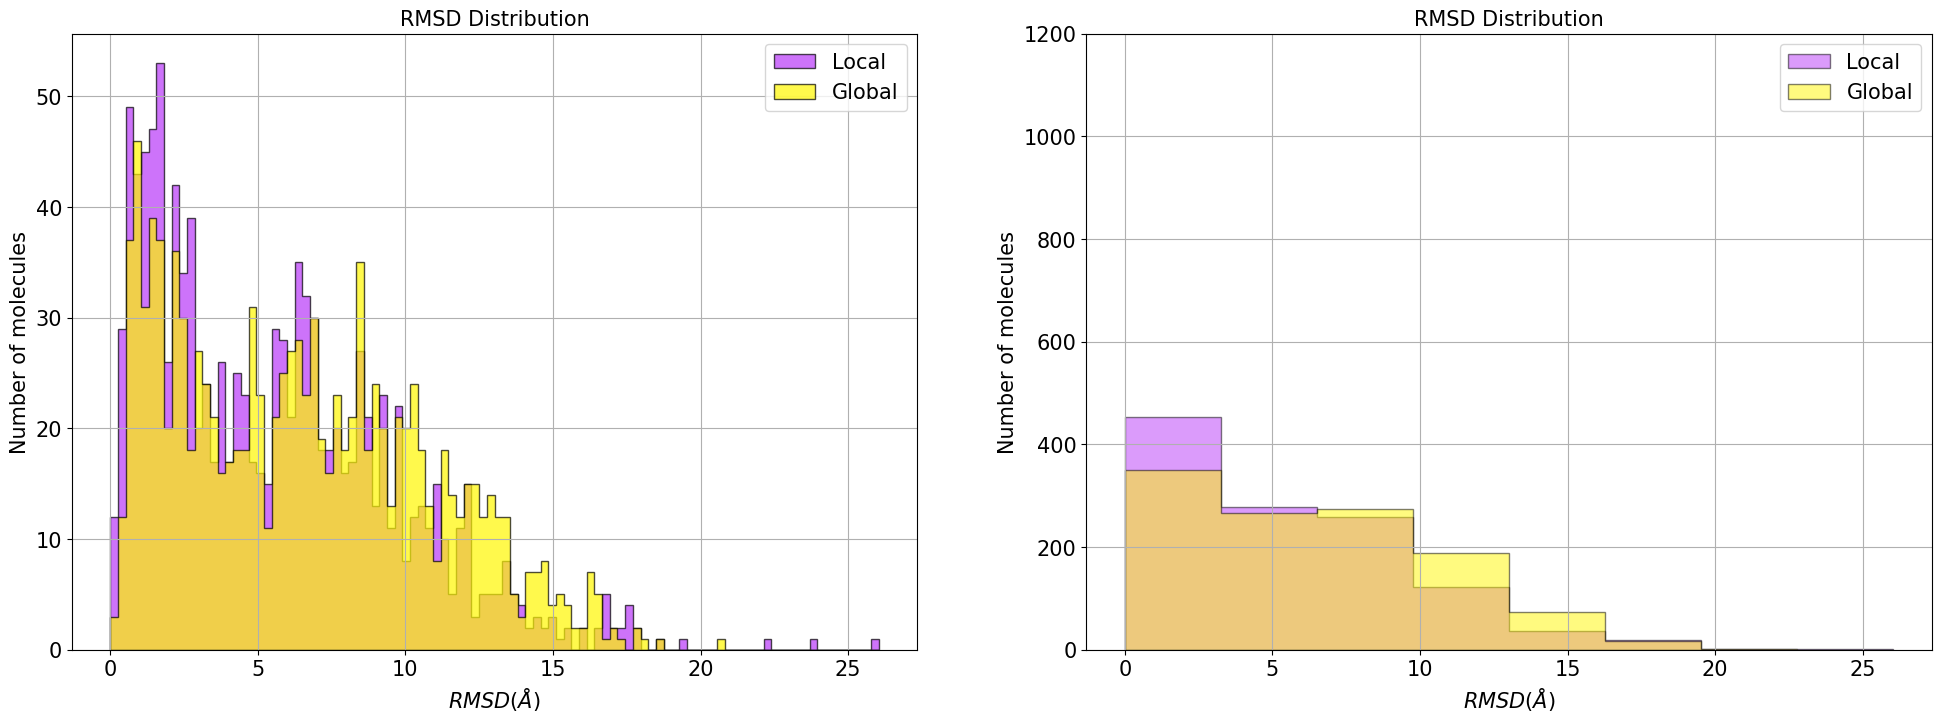

In [129]:
import pandas as pd
from matplotlib import pyplot as plt

data_folder = '/content/drive/MyDrive/pyLiBELa/data'
%cd ~
%cd $data_folder

rmsd_filename_mma = 'rmsd_sb2021_mma_dockrmsd.out'
rmsd_filename_stogo = 'rmsd_sb2021_stogo_dockrmsd.out'

df = pd.read_csv(rmsd_filename_mma,sep='\t',header=None,names=['PDB','Local'])
df['Global']= pd.read_csv(rmsd_filename_stogo, usecols = [1], sep='\t',header=None)


#df

fig= plt.figure(figsize=(24,8))
plt.style.use('default')

ax1 = fig.add_subplot(1,2,1)

n_bins = 100
df.plot(kind='hist',
        alpha=0.7,
        bins=n_bins,
        title='RMSD Distribution',
        grid=True,
        ax = ax1,
        fontsize=15,
        histtype='stepfilled',
        color = ['#b838f8', '#fff700'],
        edgecolor='k')

ax1.set_title('RMSD Distribution',fontsize=15)
ax1.set_xlabel(r'$RMSD (\AA)$',fontsize=15)
ax1.set_ylabel('Number of molecules',fontsize=15)
ax1.legend(fontsize=15)

ax2 = fig.add_subplot(1,2,2)

df.plot(kind='hist',
        bins=8,
        alpha = 0.5,
        grid=True,
        ax = ax2,
        fontsize=15,
        histtype='stepfilled',
        color = ['#b838f8', '#fff700'],
        edgecolor='k')

ax2.legend(fontsize=15)
ax2.set_ylim(0,1200)
ax2.set_title('RMSD Distribution',fontsize=15)
ax2.set_xlabel(r'$RMSD (\AA)$',fontsize=15)
ax2.set_ylabel('Number of molecules',fontsize=15)


#ax2.plot([0,8.68],[0.7824*1172,0.7824*1172],'k--')

In [128]:
for optimization in ['Local','Global']:
  total = len(df[optimization])
#  print('Total',total)
  #print(df[optimization].max())
  print(optimization)
  print('')

  for val in [3,2,1]:
    sub_val = df[optimization] < val
    sub_val = sub_val.sum()
    print('%.2f%% abaixo de %.1f Angstrom.'%(100*sub_val/total,val))
    print('')





Local

36.86% abaixo de 3.0 Angstrom.

25.34% abaixo de 2.0 Angstrom.

10.84% abaixo de 1.0 Angstrom.

Global

27.56% abaixo de 3.0 Angstrom.

18.77% abaixo de 2.0 Angstrom.

7.94% abaixo de 1.0 Angstrom.



In [96]:
rmsd_obrmsd_file = open(data_folder+'/rmsd_sb2021_local_obrmsd.out','r')
rmsd_obrmsd_lines = rmsd_obrmsd_file.readlines()

rmsd_obrmsd = np.zeros(len(rmsd_obrmsd_lines)-4)
#rmsd_obrmsd = list(rmsd_obrmsd)

i=0
for rmsd in rmsd_obrmsd_lines:
  if rmsd[0] != '#':
    rmsd = rmsd.split()[1]
    #print(rmsd.split()[1])
    if rmsd == 'None':
      rmsd_obrmsd[i] = 21
    elif rmsd == 'inf':
      rmsd_obrmsd[i] = 28
    elif rmsd[0] == '=':
      rmsd_obrmsd[i] = -1
    else:
      rmsd_obrmsd[i] = float(rmsd)

    i+=1



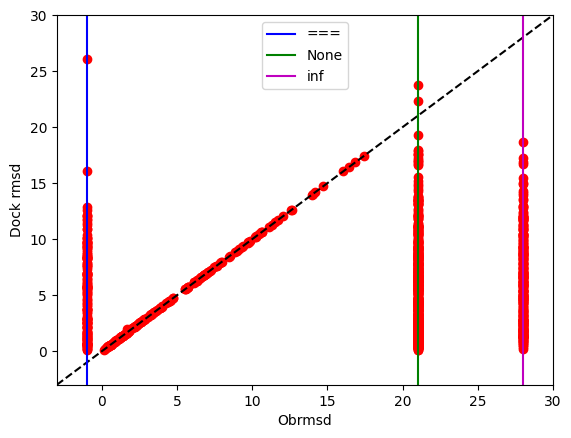

In [105]:
plt.plot(rmsd_obrmsd,df['Local rmsd'], 'ro')
plt.plot([-3,40],[-3,40],'k--')

plt.ylabel('Dock rmsd')
plt.xlabel('Obrmsd')

plt.ylim(-3,30)
plt.xlim(-3,30)

plt.plot([-1,-1],[-3,30],'b',label='===')
plt.plot([21,21],[-3,30],'g',label='None')
plt.plot([28,28],[-3,30],'m',label='inf')

plt.legend(loc=9)